In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/North Western.csv'
df = pd.read_csv(file_path)
print(df)

                 Unnamed: 0                  Unnamed: 1 Mar 2010 Unnamed: 83  \
0   North Western Melbourne  Broadmeadows-Roxburgh Park    1,040     $300.00   
1                       NaN                   Brunswick    1,705     $350.00   
2                       NaN    Coburg-Pascoe Vale South    1,041     $350.00   
3                       NaN                 Craigieburn      657     $310.00   
4                       NaN              East Brunswick      462     $370.00   
5                       NaN                    Essendon    1,486     $320.00   
6                       NaN  Gladstone Park-Tullamarine      485     $290.00   
7                       NaN                      Keilor       66     $350.00   
8                       NaN     Moonee Ponds-Ascot Vale    1,161     $350.00   
9                       NaN    Oak Park-Glenroy-Fawkner    1,201     $300.00   
10                      NaN    Pascoe Vale-Coburg North      714     $320.00   
11                      NaN             

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

# Display the updated DataFrame
print(df)

                       Area                      Suburb Count.1 Median.1  \
0   North Western Melbourne  Broadmeadows-Roxburgh Park   1,040  $300.00   
1                       NaN                   Brunswick   1,705  $350.00   
2                       NaN    Coburg-Pascoe Vale South   1,041  $350.00   
3                       NaN                 Craigieburn     657  $310.00   
4                       NaN              East Brunswick     462  $370.00   
5                       NaN                    Essendon   1,486  $320.00   
6                       NaN  Gladstone Park-Tullamarine     485  $290.00   
7                       NaN                      Keilor      66  $350.00   
8                       NaN     Moonee Ponds-Ascot Vale   1,161  $350.00   
9                       NaN    Oak Park-Glenroy-Fawkner   1,201  $300.00   
10                      NaN    Pascoe Vale-Coburg North     714  $320.00   
11                      NaN                     Sunbury     701  $280.00   
12          

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                        Suburb Median.1 Median.2 Median.3 Median.4 Median.5  \
0   Broadmeadows-Roxburgh Park  $300.00  $300.00  $300.00  $310.00  $310.00   
1                    Brunswick  $350.00  $350.00  $350.00  $360.00  $370.00   
2     Coburg-Pascoe Vale South  $350.00  $350.00  $350.00  $355.00  $360.00   
3                  Craigieburn  $310.00  $320.00  $320.00  $320.00  $330.00   
4               East Brunswick  $370.00  $380.00  $390.00  $390.00  $400.00   
5                     Essendon  $320.00  $320.00  $330.00  $330.00  $330.00   
6   Gladstone Park-Tullamarine  $290.00  $300.00  $300.00  $310.00  $310.00   
7                       Keilor  $350.00  $351.00  $350.00  $345.00  $350.00   
8      Moonee Ponds-Ascot Vale  $350.00  $350.00  $360.00  $360.00  $370.00   
9     Oak Park-Glenroy-Fawkner  $300.00  $310.00  $320.00  $320.00  $320.00   
10    Pascoe Vale-Coburg North  $320.00  $320.00  $330.00  $330.00  $340.00   
11                     Sunbury  $280.00  $285.00  $2

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                        Suburb  Median.1  Median.2  Median.3  Median.4  \
0   Broadmeadows-Roxburgh Park     300.0     300.0     300.0     310.0   
1                    Brunswick     350.0     350.0     350.0     360.0   
2     Coburg-Pascoe Vale South     350.0     350.0     350.0     355.0   
3                  Craigieburn     310.0     320.0     320.0     320.0   
4               East Brunswick     370.0     380.0     390.0     390.0   
5                     Essendon     320.0     320.0     330.0     330.0   
6   Gladstone Park-Tullamarine     290.0     300.0     300.0     310.0   
7                       Keilor     350.0     351.0     350.0     345.0   
8      Moonee Ponds-Ascot Vale     350.0     350.0     360.0     360.0   
9     Oak Park-Glenroy-Fawkner     300.0     310.0     320.0     320.0   
10    Pascoe Vale-Coburg North     320.0     320.0     330.0     330.0   
11                     Sunbury     280.0     285.0     290.0     295.0   
12              West Brunswick     285

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_71768/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                       Suburb  Median.1  Median.2  Median.3  Median.4  \
0  Broadmeadows-Roxburgh Park       300       300       300       310   
1                   Brunswick       350       350       350       360   
2    Coburg-Pascoe Vale South       350       350       350       355   
3                 Craigieburn       310       320       320       320   
4              East Brunswick       370       380       390       390   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0       310       310       312       320       315  ...        350   
1       370       370       380       390       390  ...        450   
2       360       360       360       360       370  ...        430   
3       330       330       330       330       330  ...        360   
4       400       400       410       420       420  ...        440   

   Median.33  Median.34  Median.35  Median.36  Median.37  Median.38  \
0        360        3

Growth trend for Broadmeadows-Roxburgh Park:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>       0.0       0.0  3.333333       0.0       0.0  0.645161   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  2.564103   -1.5625        0.0  ...   2.857143        0.0        2.5   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   0.271003        0.0        0.0        0.0        0.0   6.756757   

   Average Growth Rate (%)  
0                 0.700834  

[1 rows x 42 columns]


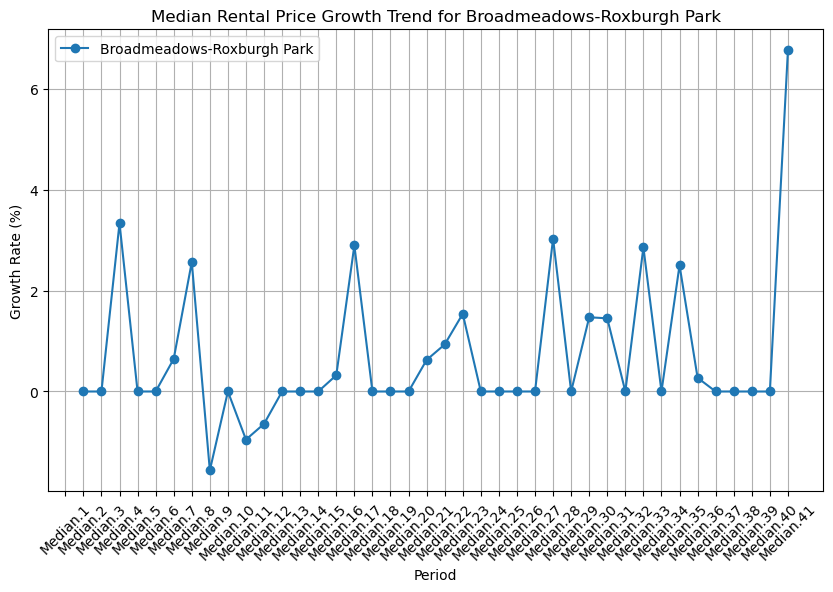

Growth trend for Brunswick:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0       0.0  2.857143  2.777778       0.0  2.702703   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1  2.631579       0.0   1.282051  ...        0.0        0.0   2.222222   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   1.086957   0.645161    0.42735        0.0    2.12766   1.041667   

   Average Growth Rate (%)  
1                 0.824659  

[1 rows x 42 columns]


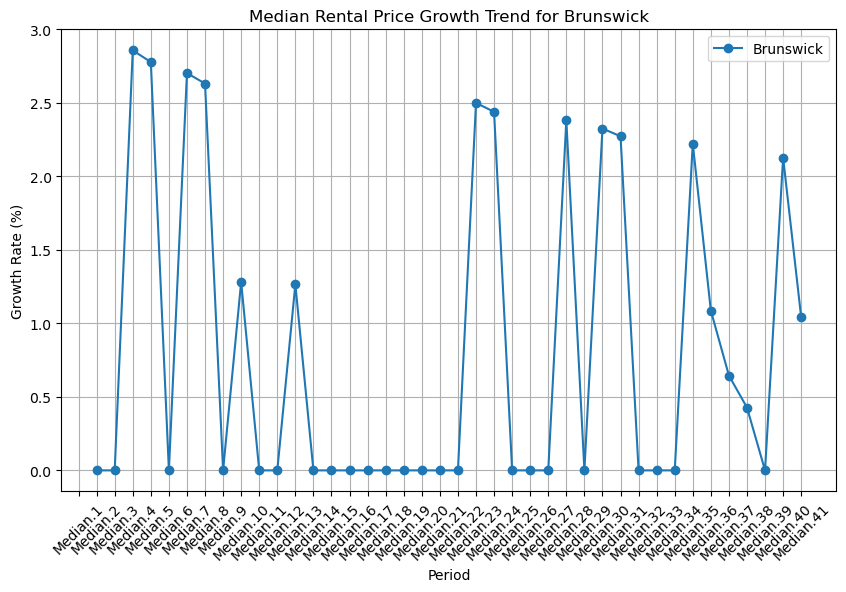

Growth trend for Coburg-Pascoe Vale South:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>       0.0       0.0  1.428571  1.408451       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2       0.0  2.777778        0.0  ...        0.0   2.325581   1.136364   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2   1.123596        0.0        0.0        0.0        0.0   5.555556   

   Average Growth Rate (%)  
2                 0.773595  

[1 rows x 42 columns]


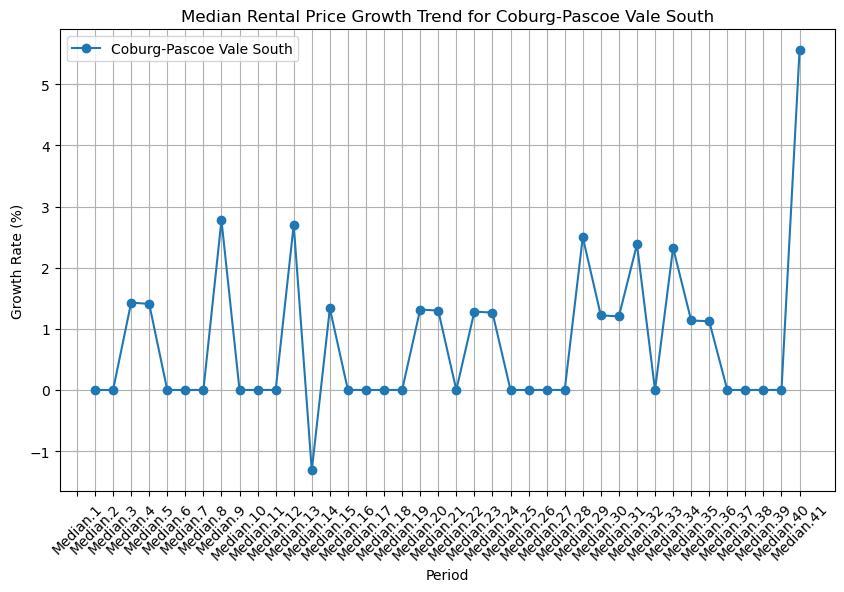

Growth trend for Craigieburn:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  3.225806       0.0       0.0     3.125       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       0.0       0.0        0.0  ...        0.0   2.777778   2.702703   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3        0.0        0.0   0.789474   1.827676        0.0   7.948718   

   Average Growth Rate (%)  
3                 0.781896  

[1 rows x 42 columns]


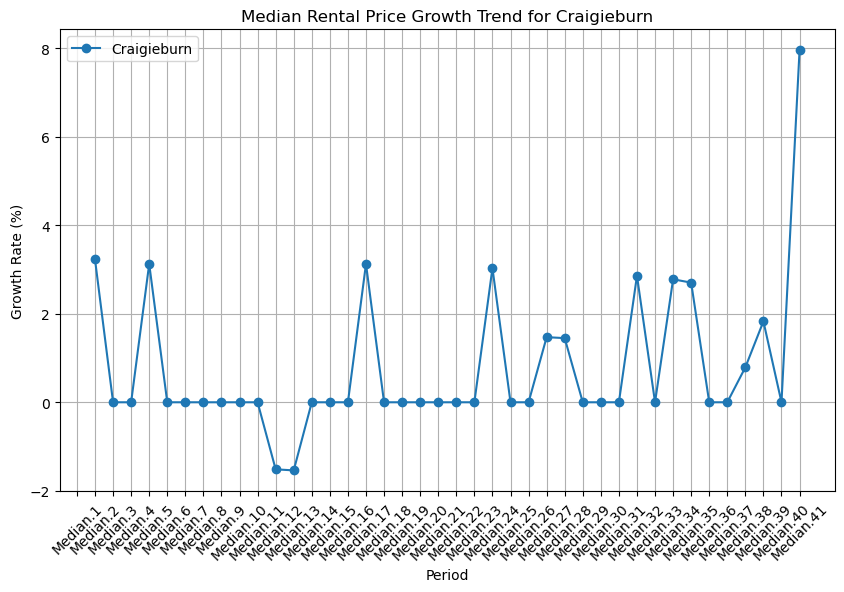

Growth trend for East Brunswick:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  2.702703  2.631579       0.0  2.564103       0.0       2.5   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4  2.439024       0.0   2.380952  ...        0.0  -1.590909  -0.692841   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.162791   2.298851   1.123596   2.222222   1.086957  -3.225806   

   Average Growth Rate (%)  
4                 0.520134  

[1 rows x 42 columns]


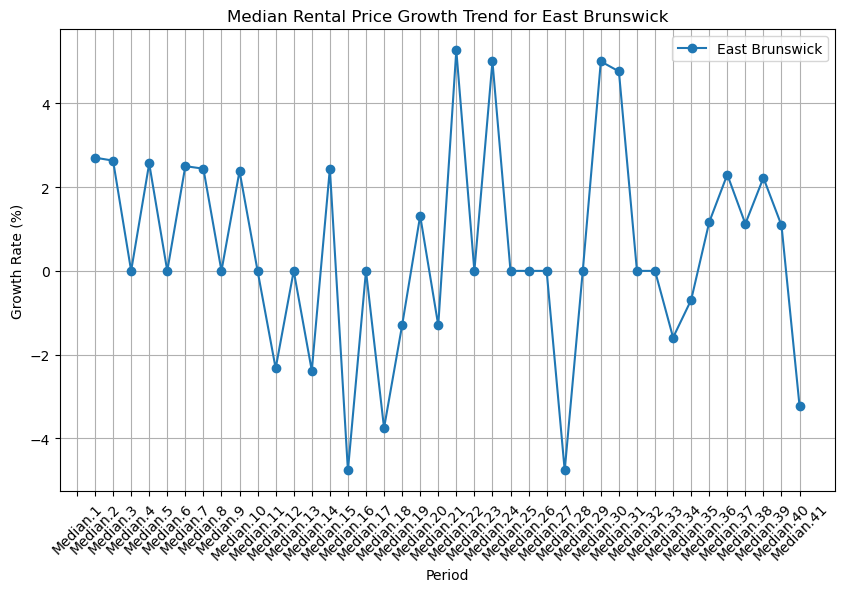

Growth trend for Essendon:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>       0.0     3.125       0.0       0.0  1.515152  1.492537   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5       0.0  2.941176        0.0  ...   2.564103        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5        0.0        2.5        0.0        0.0   0.731707   2.905569   

   Average Growth Rate (%)  
5                 0.717632  

[1 rows x 42 columns]


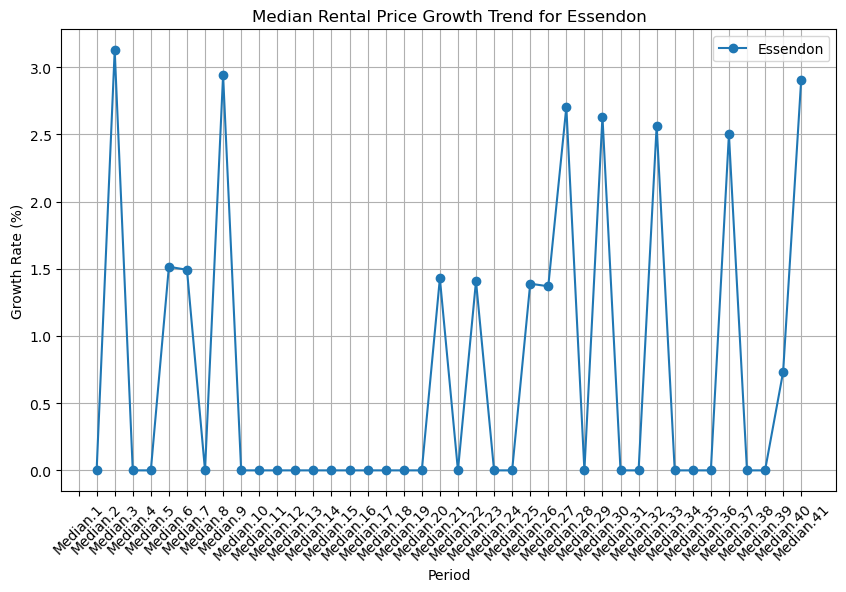

Growth trend for Gladstone Park-Tullamarine:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>  3.448276       0.0  3.333333       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6  3.225806       0.0     1.5625  ...        0.0   2.702703        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0        0.0   2.105263   0.515464        0.0   7.692308   

   Average Growth Rate (%)  
6                 0.943454  

[1 rows x 42 columns]


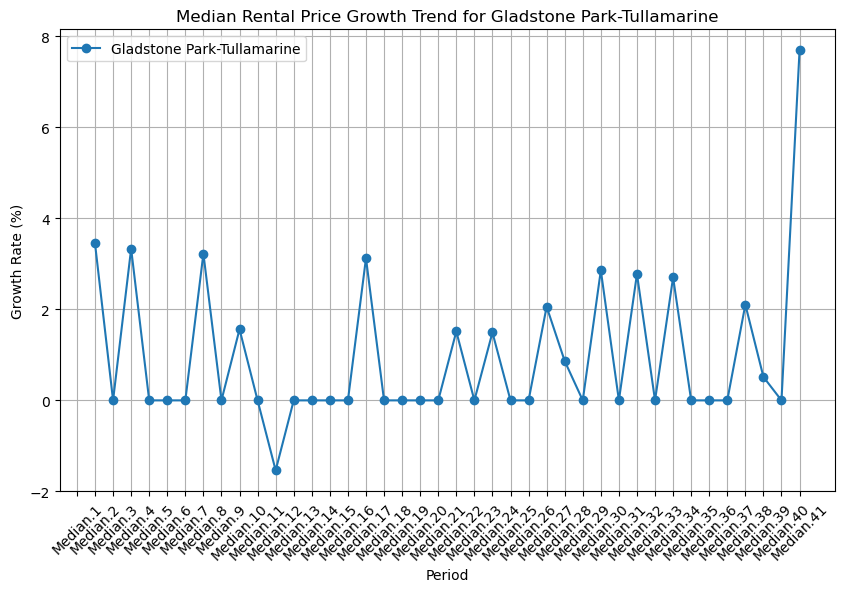

Growth trend for Keilor:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>  0.285714   -0.2849 -1.428571  1.449275 -2.857143       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7  2.941176       0.0        0.0  ...        0.0        7.5   6.976744   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7  -2.173913        0.0        0.0  -6.666667        0.0  14.285714   

   Average Growth Rate (%)  
7                 0.850033  

[1 rows x 42 columns]


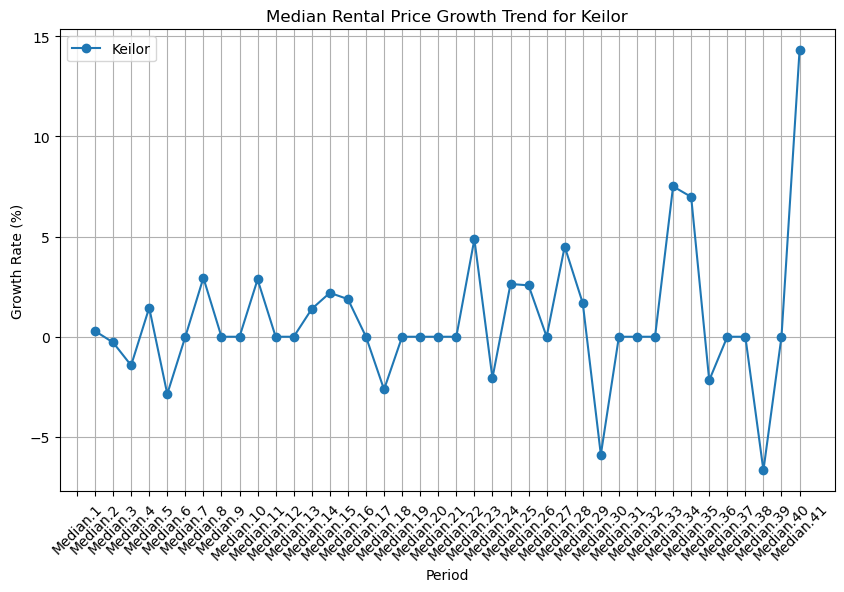

Growth trend for Moonee Ponds-Ascot Vale:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>       0.0  2.857143       0.0  2.777778  1.351351  1.333333   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8       0.0  1.315789   1.298701  ...        0.0   2.325581        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0        0.0   2.272727  -2.222222   2.272727   2.222222   

   Average Growth Rate (%)  
8                 0.693501  

[1 rows x 42 columns]


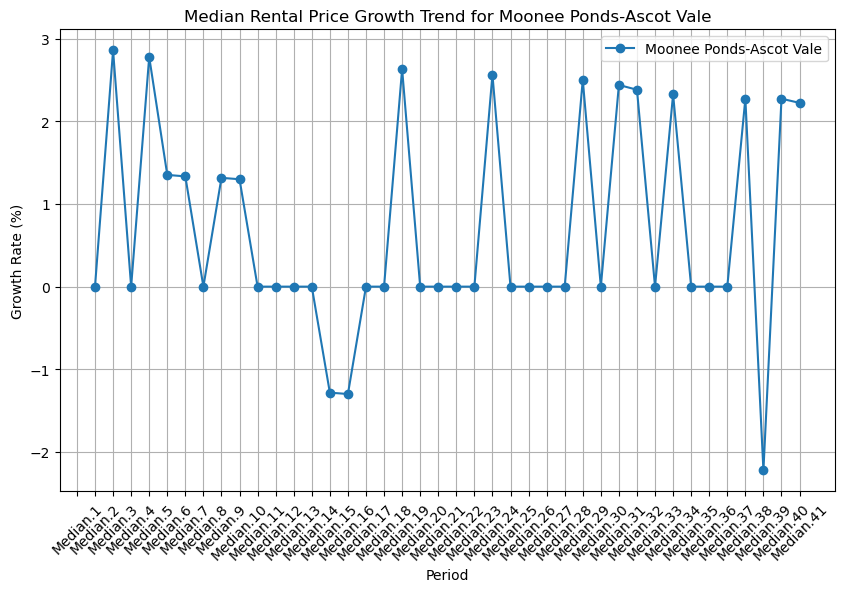

Growth trend for Oak Park-Glenroy-Fawkner:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
9      <NA>  3.333333  3.225806       0.0       0.0     3.125       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
9       0.0       0.0        0.0  ...   2.702703        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
9   2.631579        0.0   0.512821   2.040816        0.0       3.75   

   Average Growth Rate (%)  
9                 0.824463  

[1 rows x 42 columns]


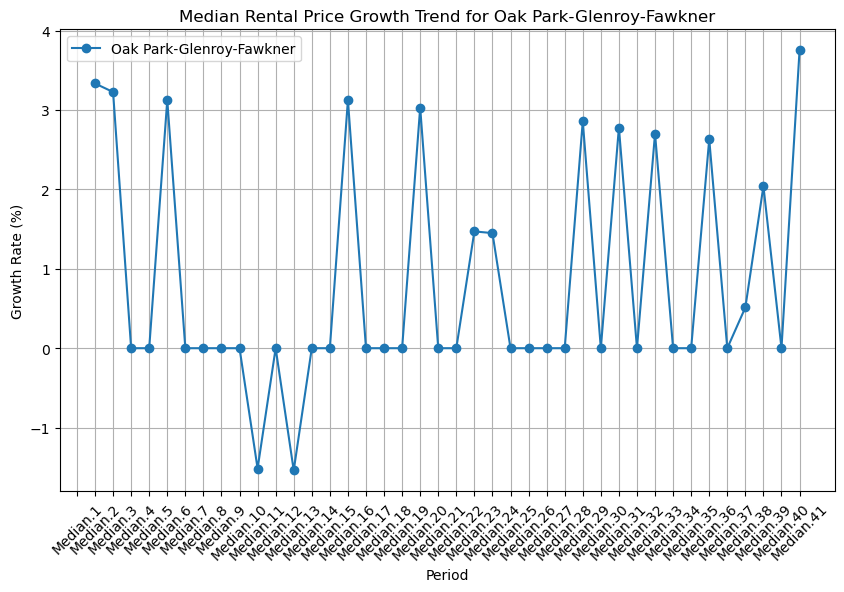

Growth trend for Pascoe Vale-Coburg North:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
10      <NA>       0.0     3.125       0.0  3.030303       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
10       0.0  2.941176  -1.428571  ...        0.0        0.0        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
10        2.5        0.0   2.439024        0.0        0.0   5.952381   

    Average Growth Rate (%)  
10                 0.839186  

[1 rows x 42 columns]


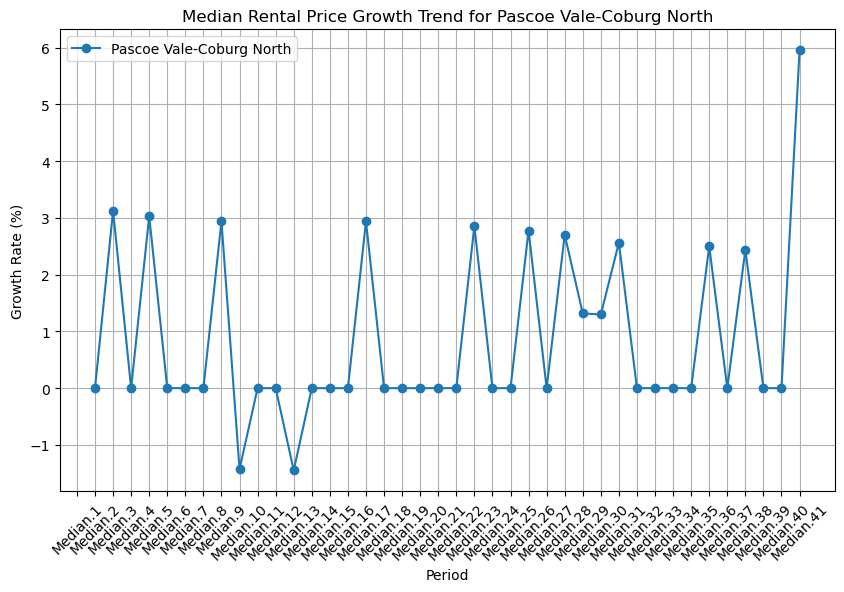

Growth trend for Sunbury:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
11      <NA>  1.785714  1.754386  1.724138  1.694915       0.0  1.666667   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
11  1.639344       0.0        0.0  ...   2.857143        0.0   0.833333   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
11   1.928375        0.0   1.351351   1.333333        0.0  10.526316   

    Average Growth Rate (%)  
11                 1.034867  

[1 rows x 42 columns]


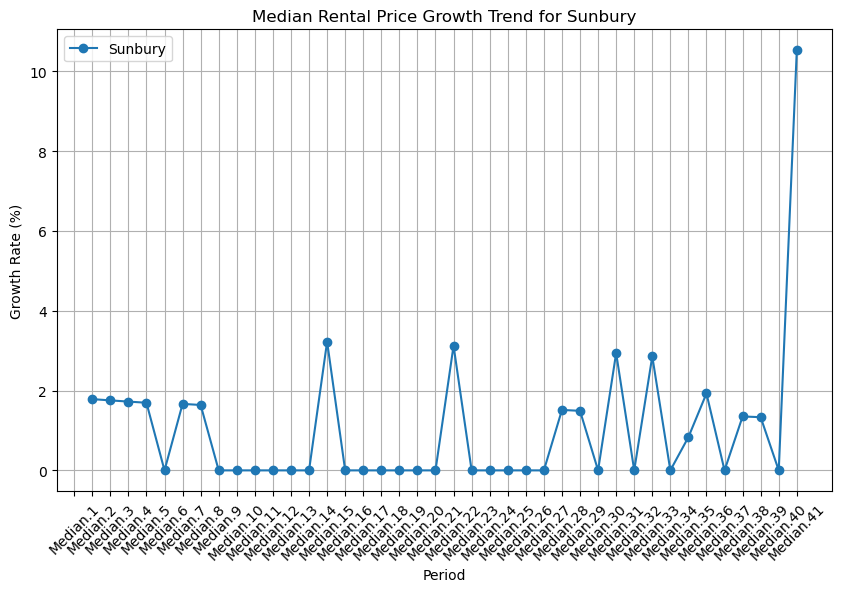

Growth trend for West Brunswick:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
12      <NA>  1.754386       0.0  1.724138  1.694915       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
12       0.0       0.0   6.666667  ...        0.0   1.388889   1.369863   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
12   1.351351        0.8   0.529101   2.631579        0.0        0.0   

    Average Growth Rate (%)  
12                 0.798577  

[1 rows x 42 columns]


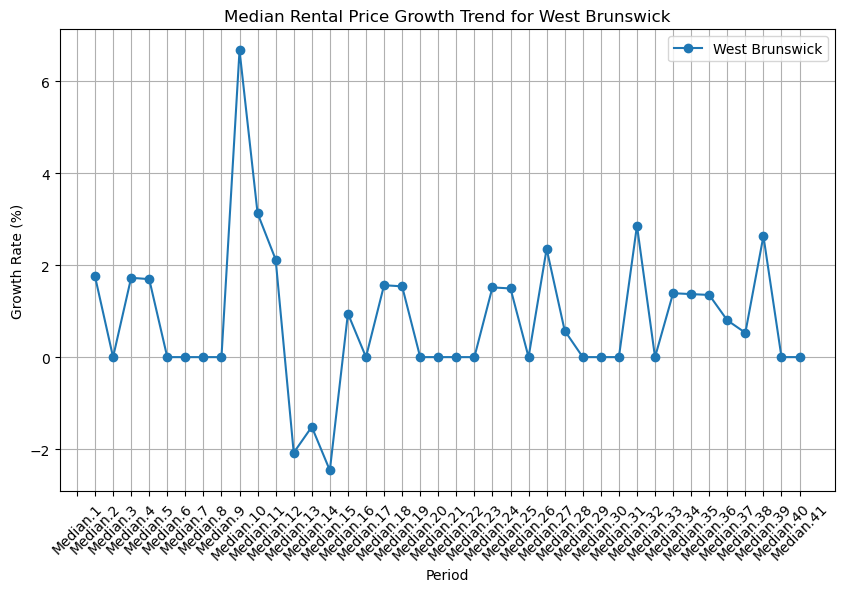

Growth trend for Group Total:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
13      <NA>       0.0    1.5625  1.538462       0.0  1.515152  1.492537   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
13       0.0       0.0        0.0  ...   2.631579        0.0   2.564103   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
13        0.0        0.0        0.0        0.0        0.0        7.5   

    Average Growth Rate (%)  
13                 0.750968  

[1 rows x 42 columns]


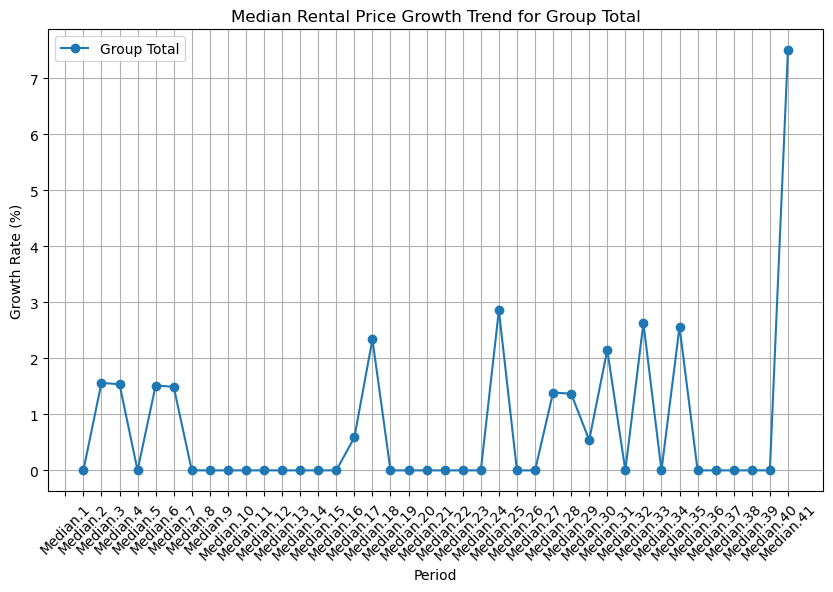

All suburbs growth trends:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0       <NA>       0.0       0.0  3.333333       0.0       0.0  0.645161   
1       <NA>       0.0       0.0  2.857143  2.777778       0.0  2.702703   
2       <NA>       0.0       0.0  1.428571  1.408451       0.0       0.0   
3       <NA>  3.225806       0.0       0.0     3.125       0.0       0.0   
4       <NA>  2.702703  2.631579       0.0  2.564103       0.0       2.5   
5       <NA>       0.0     3.125       0.0       0.0  1.515152  1.492537   
6       <NA>  3.448276       0.0  3.333333       0.0       0.0       0.0   
7       <NA>  0.285714   -0.2849 -1.428571  1.449275 -2.857143       0.0   
8       <NA>       0.0  2.857143       0.0  2.777778  1.351351  1.333333   
9       <NA>  3.333333  3.225806       0.0       0.0     3.125       0.0   
10      <NA>       0.0     3.125       0.0  3.030303       0.0       0.0   
11      <NA>  1.785714  1.754386  1.724138  1.694915       0.

In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0     0.700834
1     0.824659
2     0.773595
3     0.781896
4     0.520134
5     0.717632
6     0.943454
7     0.850033
8     0.693501
9     0.824463
10    0.839186
11    1.034867
12    0.798577
13    0.750968
Name: Average Growth Rate (%), dtype: Float64


In [8]:
print(df["Suburb"])

0     Broadmeadows-Roxburgh Park
1                      Brunswick
2       Coburg-Pascoe Vale South
3                    Craigieburn
4                 East Brunswick
5                       Essendon
6     Gladstone Park-Tullamarine
7                         Keilor
8        Moonee Ponds-Ascot Vale
9       Oak Park-Glenroy-Fawkner
10      Pascoe Vale-Coburg North
11                       Sunbury
12                West Brunswick
13                   Group Total
Name: Suburb, dtype: object
